In [1]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import datetime

calling ds_preamble..
calling ds_helper...


# analyze crypto data

# why change to datetime64 format in pandas, instead of using the string representation of datetime?
- exposes many useful attributes (e.g., `dt.weekday_name`, `dayofyear`, `dt.hour`)
- allows comparison with timestamp from `pd.datetime('2021-01-11)`, for example
- can do comparison with string: `df.date > '2012'`
- aggregation on datetime (e.g., `mean`, `max`)

# why set datetime as index?
- slicing

In [3]:
def date_parse(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d %I-%p') 

path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/code_from_others/Corey_code/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'
df = pd.read_csv(path)
# df = pd.read_csv(path, parse_dates=['Date'], date_parser=date_parse)
df
df.info()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p')
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [7]:
df = df.set_index('Date')

In [14]:
df['DayOfWeek'] = df.index.day_name()
df['Year'] = df.index.year
df['Month'] = df.index.month

,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,2020,3
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,2020,3
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,2020,3
...,...,...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday,2017,7
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday,2017,7
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday,2017,7


In [25]:
df.index.min()
df.index.max()
df.index.max() - df.index.min()
df.index[1] - df.index[0]
pd.Series(df.index).describe(datetime_is_numeric=True)

Timestamp('2017-07-01 11:00:00')

Timestamp('2020-03-13 20:00:00')

Timedelta('986 days 09:00:00')

Timedelta('-1 days +23:00:00')

count                  23674
mean     2018-11-06 15:30:00
min      2017-07-01 11:00:00
25%      2018-03-05 01:15:00
50%      2018-11-06 15:30:00
75%      2019-07-11 05:45:00
max      2020-03-13 20:00:00
Name: Date, dtype: object

In [58]:
# filter by year
df[df.index>'2020']
# df.query("index >'2020'") # same as above

# filter by date
df[df.index>'2020-01-01']
# df.query("index >'2020-01-01'") # same as above

# filter by chain by year
df[(df.index >= '2019') & (df.index < '2020')]
# df['2019' <= df.index < '2020'] # not work 
# df.query(" '2019' <= index <'2020' ") # inside query, we can do chain inequality
# df.query(" 2019 <= index <2020 ") # same as above. QUESTION: Why no need quotes for the year??

# filter by chain by date 
df[(df.index>='2019-12-29') & (df.index<'2020-01-01')] # same as above
# df[(df.index>=pd.to_datetime('2019-12-29')) & (df.index<pd.to_datetime('2020-01-01'))]
# df.query(" '2019-12-29' <= index <'2020-01-01' ")

# df.Index[0] >= '2019' # not work. TypeError: '>=' not supported between instances of 'Timestamp' and 'str'

,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,2020,3
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,2020,3
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,2020,3
...,...,...,...,...,...,...,...,...,...
2020-01-01 05:00:00,ETHUSD,129.56,129.94,129.47,129.83,232163.70,Wednesday,2020,1
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday,2020,1
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday,2020,1


,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,2020,3
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,2020,3
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,2020,3
...,...,...,...,...,...,...,...,...,...
2020-01-01 05:00:00,ETHUSD,129.56,129.94,129.47,129.83,232163.70,Wednesday,2020,1
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday,2020,1
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday,2020,1


,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,2019,12
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,2019,12
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday,2019,12
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday,2019,12
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday,2019,12
...,...,...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday,2019,1
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday,2019,1
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday,2019,1


,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,2019,12
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,2019,12
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday,2019,12
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday,2019,12
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday,2019,12
...,...,...,...,...,...,...,...,...,...
2019-12-29 04:00:00,ETHUSD,127.91,127.93,127.61,127.87,202681.95,Sunday,2019,12
2019-12-29 03:00:00,ETHUSD,127.96,127.96,127.78,127.91,106307.28,Sunday,2019,12
2019-12-29 02:00:00,ETHUSD,127.48,127.96,127.47,127.96,90955.03,Sunday,2019,12


In [60]:
# slicing, if timestamp is set as index 

# df['2019'] # warning. avoid!
df.loc['2019'] # get all year 2019 records
df['2019-01-05':'2022-09-03']
df['2019-01-05':'2022-09-03'].Close.mean()

# access a single record
df.loc['2020-01-01'].max() 

,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday,2019,12
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday,2019,12
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday,2019,12
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday,2019,12
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday,2019,12
...,...,...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday,2019,1
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday,2019,1
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday,2019,1


,Symbol,Open,High,Low,Close,Volume,DayOfWeek,Year,Month
Date,,,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020,3
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020,3
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,2020,3
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,2020,3
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,2020,3
...,...,...,...,...,...,...,...,...,...
2019-01-05 04:00:00,ETHUSD,158.94,159.77,158.40,158.41,1139439.22,Saturday,2019,1
2019-01-05 03:00:00,ETHUSD,158.78,159.50,157.77,158.94,923896.77,Saturday,2019,1
2019-01-05 02:00:00,ETHUSD,159.42,160.20,157.73,158.78,1979540.21,Saturday,2019,1


183.9036800153654

# resampling
- why resampling? 
    - for plotting

(2,)

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

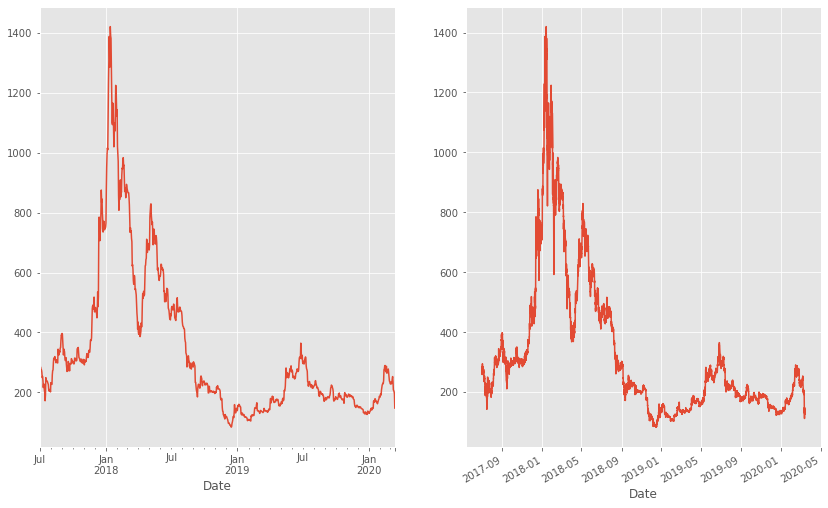

In [73]:
highs = df['High'].resample('1D').max()

assert highs['2020-01-01'] == df.loc['2020-01-01'].High.max() # sanity check 

fig, axes = plt.subplots(1,2, figsize=(14,9))

axes.shape

highs.plot(ax=axes[0]) # resampled version
df.High.plot(ax=axes[1])

<AxesSubplot:>

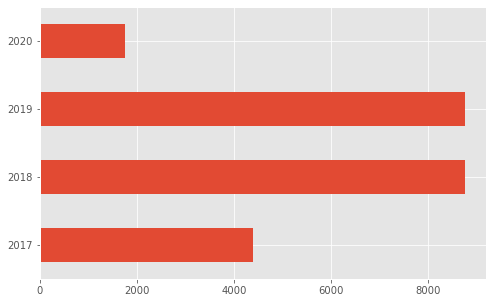

In [80]:
df.Year.value_counts().sort_index().plot.barh()
# df.year.value_counts().sort_index().plot.bar()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek,year
Date,,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,NaN
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,NaN
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,NaN
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,NaN
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,NaN
...,...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday,NaN
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday,NaN
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday,NaN


In [ ]:
# df.resample('W').mean() # not useful. Want to have different aggregation for each column
df.resample('W').agg({'Close':[('my_mean', 'mean')], 'High':'max', 'Low':'min', 'Volume':'sum'}) # not useful. Want to have different aggregation for each column

,Close,High,Low,Volume
,my_mean,max,min,sum
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08


In [ ]:
# df['2019']
# df.loc['2019']


# inclusive!
df['2020-01':'2020-02']
df.loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [ ]:
df['2020-01':'2020-02'].Close.mean()

195.1655902777778

In [ ]:
df.loc['2020-01-01'].High.max()

132.68

In [ ]:
# if we want to change the time period to something else, we need to do `resampling`
highs = df.High.resample('D').max()

In [ ]:
highs['2020-01-01'] 

132.68

<AxesSubplot:xlabel='Date'>

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='Date'>

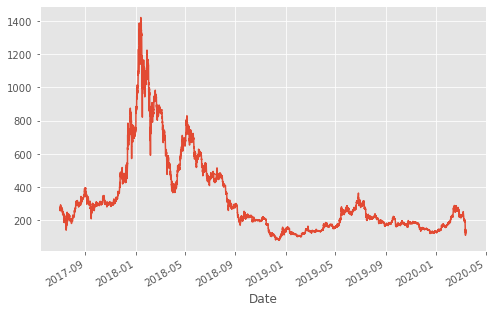

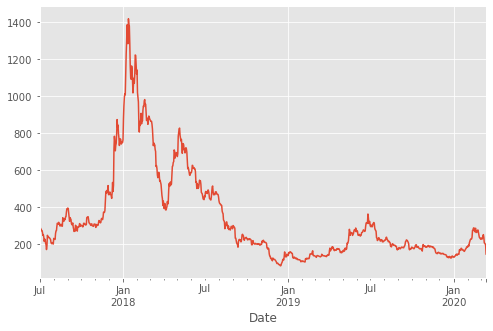

In [ ]:
df.High.plot()
plt.figure()
highs.plot()

In [ ]:
df.dtypes
# df.loc[0, 'Date']
# df.loc[0, 'Date'].day_name()

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [ ]:
df = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
# df.nunique()
df['Time'] = pd.to_datetime(df.Time)

In [ ]:
# df.Time.dt.weekday
df['day'] = df.Time.dt.day_name()
df['year'] = df.Time.dt.year

<AxesSubplot:>

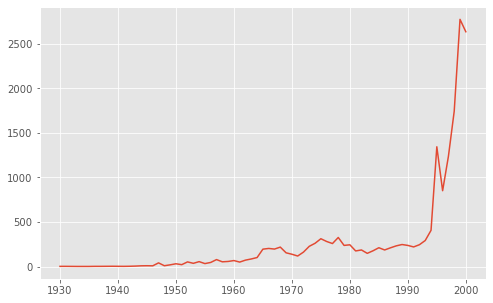

In [ ]:
# sns.countplot(x=df.day)

# df.year.value_counts()

# sns.lineplot(x=[4,5,6,6,6], y=[1,2,50,33,10000], ci=True)



# plt.figure()
# sns.lineplot(x=df.year)
# df.year.value_counts().sort_index().plot()


temp = df.year.value_counts()
sns.lineplot(x=temp.index, y=temp.values)

In [ ]:
t = df.Time[:1]
t
t.dt.date
t.dt.time
t.dt.year
t.dt.month
t.dt.day
t.dt.hour
t.dt.minute
t.dt.second
t.dt.week
t.dt.weekofyear
t.dt.dayofweek

t.dt.month_name()
t.dt.day_name()

t.dt.days

0   1930-06-01 22:00:00
Name: Time, dtype: datetime64[ns]

0    1930-06-01
Name: Time, dtype: object

0    22:00:00
Name: Time, dtype: object

0    1930
Name: Time, dtype: int64

0    6
Name: Time, dtype: int64

0    1
Name: Time, dtype: int64

0    22
Name: Time, dtype: int64

0    0
Name: Time, dtype: int64

0    0
Name: Time, dtype: int64

/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_11888/498913194.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  t.dt.week


0    22
Name: Time, dtype: int64

/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_11888/498913194.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  t.dt.weekofyear


0    22
Name: Time, dtype: int64

0    6
Name: Time, dtype: int64

0    June
Name: Time, dtype: object

0    Sunday
Name: Time, dtype: object

AttributeError: 'DatetimeProperties' object has no attribute 'days'

NameError: name 'df' is not defined

In [ ]:
idx = pd.date_range("2018-01-01", periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts
ts.resample('2h').mean()


2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [ ]:
d = pd.Timestamp('2018-01-05')
d.day_name()

d + pd.Timedelta('1 day')

d + pd.offsets.BDay()

'Friday'

Timestamp('2018-01-06 00:00:00')

Timestamp('2018-01-08 00:00:00')

In [ ]:
# pd.date_range('2018-01-01', periods=1000)

idx



DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
tips = sns.load_dataset('tips')
tips = tips.set_index('sex')

tips.index


CategoricalIndex(['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
                  'Male', 'Male', 'Male',
                  ...
                  'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
                  'Male', 'Male', 'Female'],
                 categories=['Male', 'Female'], ordered=False, dtype='category', name='sex', length=244)

In [ ]:
dt = datetime.datetime(2011,3,15, 8, 12, 33)
dt.strftime('%Y_%m_%d_%H_%M_%S')

'2011_03_15_08_12_33'

# temp code


In [ ]:
# df.Date.dt.day_name() # get the date of the timestamp
# df['DayOfWeek'] = df.Date.dt.day_name()